<a href="https://colab.research.google.com/github/dinoferre/Python-para-DS/blob/main/06(05)_Identificando_y_Excluyendo_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte de Análisis VIII

## Identificando y Excluyendo Outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [4]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [5]:
datos.describe().round(0)

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2
count,21826.0,21826.0,21826.0,21826.0,21826.0,21826.0,21826.0,21826.0
mean,3.0,1.0,1.0,138.0,5046.0,1563.0,577.0,36.0
std,1.0,13.0,1.0,147.0,32989.0,44515.0,3832.0,137.0
min,0.0,0.0,0.0,10.0,100.0,0.0,0.0,3.0
25%,2.0,0.0,0.0,65.0,1600.0,517.0,0.0,21.0
50%,2.0,1.0,1.0,90.0,2700.0,894.0,120.0,30.0
75%,3.0,2.0,1.0,155.0,5500.0,1542.0,369.0,42.0
max,14.0,1960.0,14.0,3000.0,4500000.0,6552570.0,450625.0,15000.0


(100.0, 4500000.0)

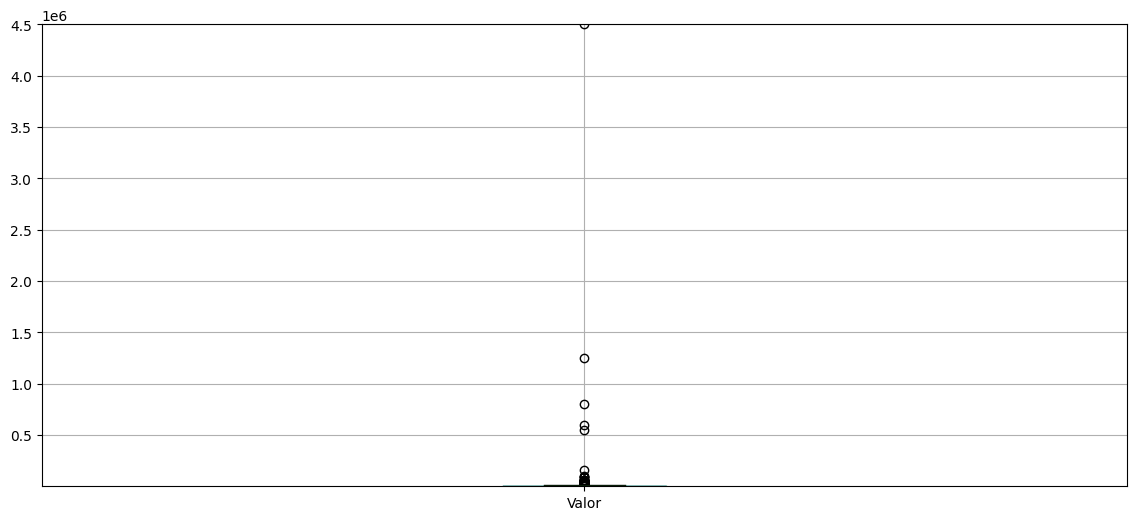

In [6]:
datos.boxplot(['Valor']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [7]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7629,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10636,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento
13846,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Departamento
15520,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Departamento


In [8]:
valor = datos['Valor']

In [9]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [10]:
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)
datos_new = datos[seleccion]

<Axes: >

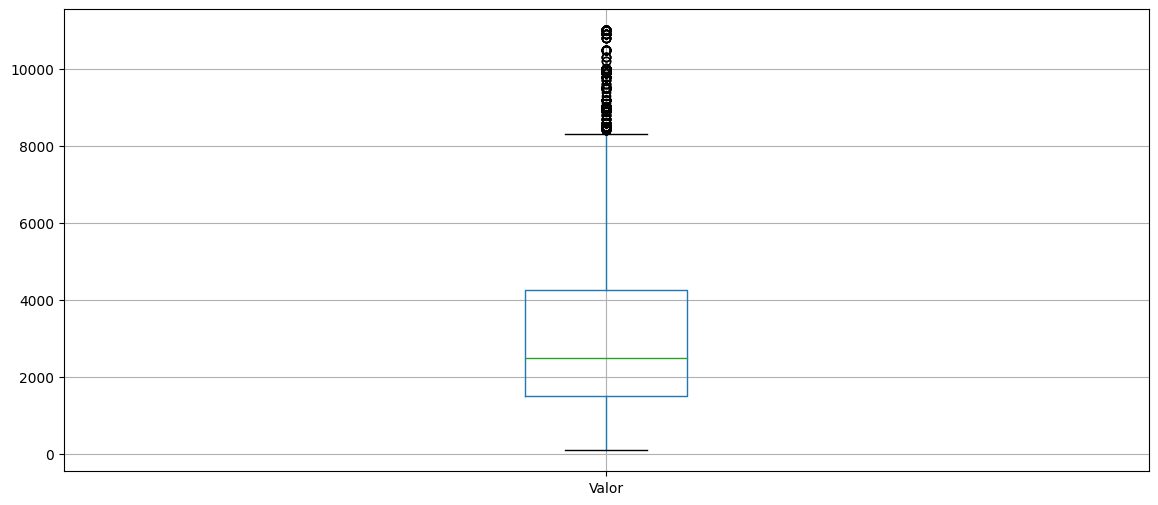

In [11]:
datos_new.boxplot(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

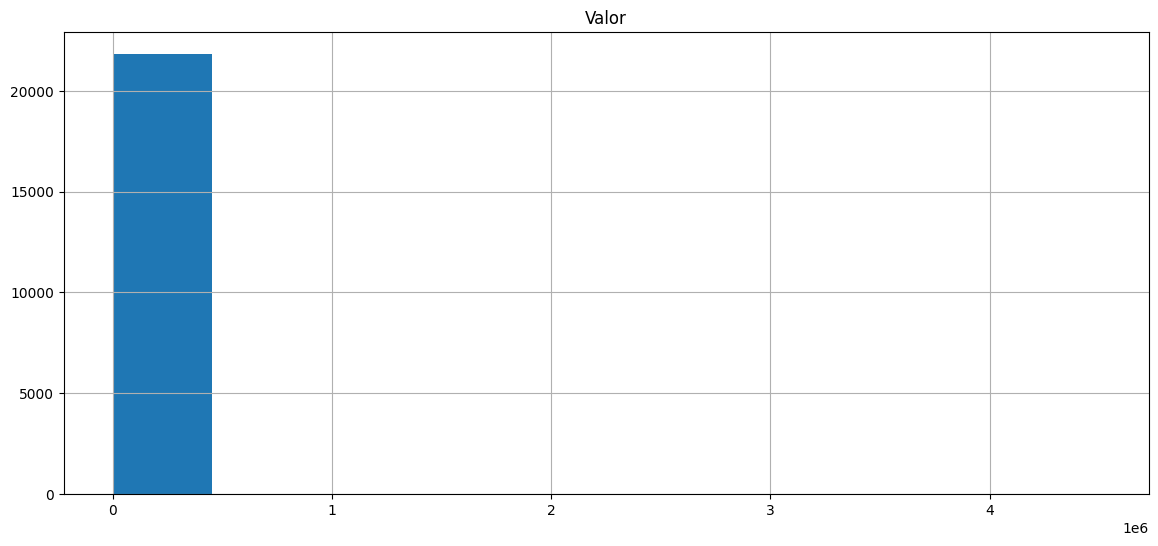

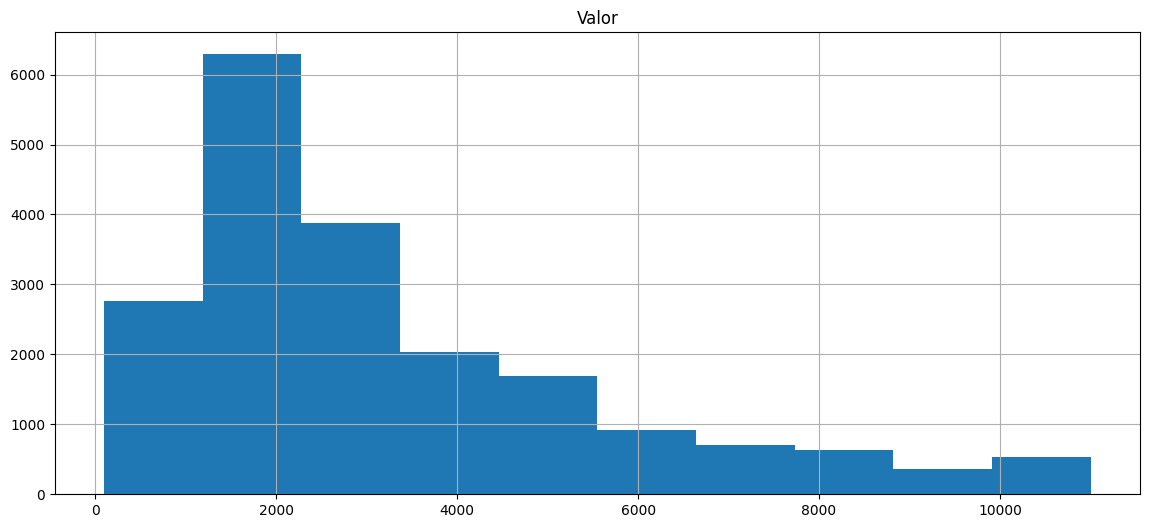

In [12]:
datos.hist(['Valor'])
datos_new.hist(['Valor'])

## Identificando y Excluyendo Outliers (continuación)

(100.0, 4500000.0)

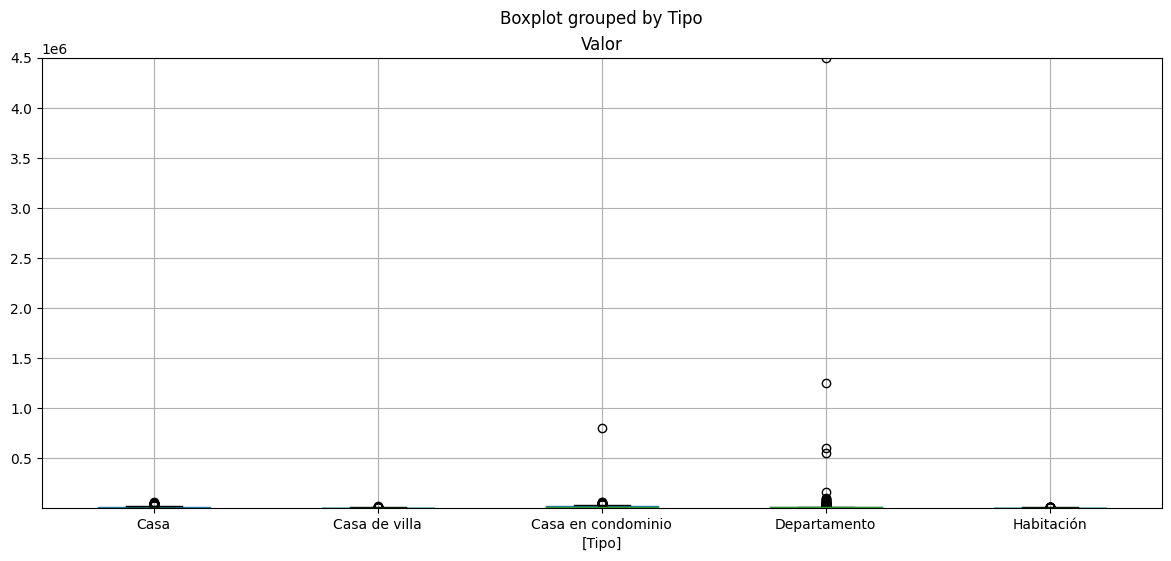

In [13]:
datos.boxplot(['Valor'], by = ['Tipo']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [14]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [15]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [16]:
grupo_tipo.groups

{'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa de villa': [81, 212, 220, 303, 332, 697, 822, 844, 918, 1012, 1353, 1362, 1447, 1491, 1553, 1639, 1669, 1703, 1769, 2087, 2249, 2267, 2446, 2533, 2547, 2605, 2641, 2727, 2840, 2872, 2977, 2984, 3017, 3025, 3300, 3426, 3523, 3703, 3823, 3855, 3858, 3863, 4094, 4146, 4153, 4165, 4340, 4444, 4826, 5151, 5170, 5175, 5198, 5294, 5410, 5535, 5597, 5724, 5751, 5911, 5950, 5995, 6008, 6031, 6049, 6201, 6236, 6300, 6348, 6402, 6429, 6754, 

In [17]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [18]:
Q1

Tipo
Casa                  1100.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1700.0
Habitación             900.0
Name: Valor, dtype: float64

In [19]:
Q3

Tipo
Casa                   9800.0
Casa de villa          1800.0
Casa en condominio    15250.0
Departamento           5000.0
Habitación             1500.0
Name: Valor, dtype: float64

In [20]:
IIQ

Tipo
Casa                   8700.0
Casa de villa          1050.0
Casa en condominio    11250.0
Departamento           3300.0
Habitación              600.0
Name: Valor, dtype: float64

In [21]:
limite_inferior

Tipo
Casa                 -11950.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3250.0
Habitación                0.0
Name: Valor, dtype: float64

In [22]:
limite_superior

Tipo
Casa                  22850.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento           9950.0
Habitación             2400.0
Name: Valor, dtype: float64

In [23]:
limite_superior['Casa']

22850.0

In [24]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo'] == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

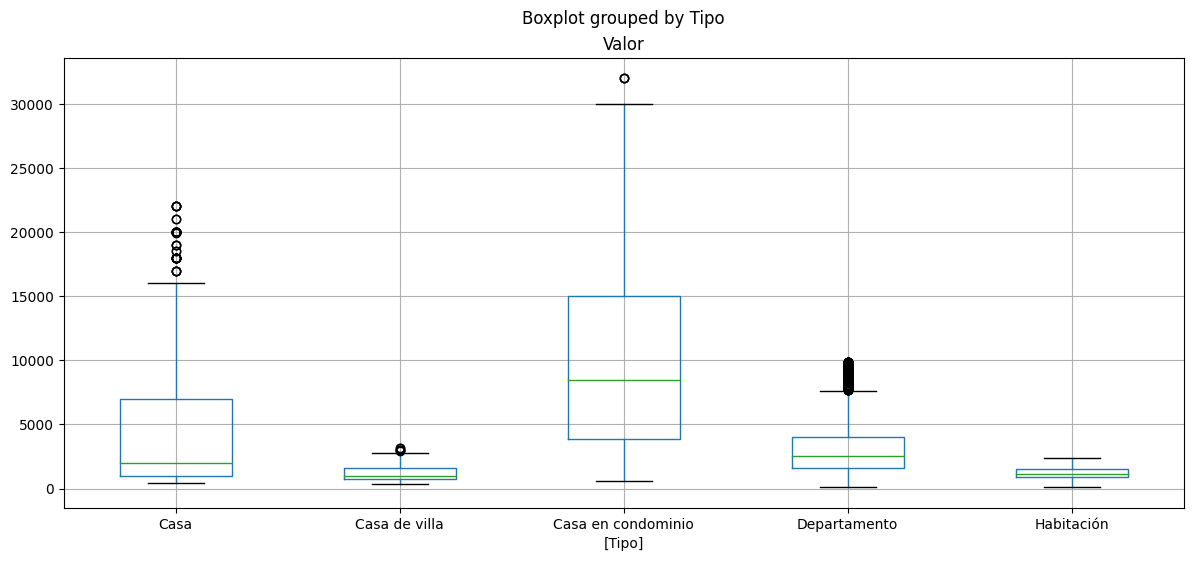

In [25]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [26]:
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep = ';', index = False)